# Intro to AI (CS331): Project 3
#### Name:
#### Roll Number:


Feel free to import any other libraries that you might need in the cell below

In [33]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import random

# PART 1 [Decision Trees]
### [35 marks]
In this part, you have to implement the ID3 algorithm that you studied in class on a simple dataset.
## Dataset
You are provided with `car.txt`. It is a simple text file where each line represents a row of data. The details of what each feature represents is provided in the manual. Using this dataset, perform the following actions:
1. The dataset has 4 class values: 
- unacc
- acc
- good
- very good

For simplifying the implementation of ID3 algorithm, we are going to change this to make only two classes: unacc and good. 
All the instances where class is unacc will remain unacc, but all the instances where the class is anything other than unacc (acc, good, or vey good), all of these would be changed to "good" and come under the same class.

2. The dataset at the moment is quite large with more than 1700 rows and has a class imbalance as well. Reduce this to get a training dataset of 500 instances and a test dataset of 100 instances, both with roughly equal instances of both class values. 
3. Lastly, we will change the categorical variables to numbers to make it easier to work with. The conversion is given in the manual. However, do store the conversion somehwere as you are going to need to convert it back at the end to show the descision tree.
4. As for how to show the decision tree, that is upto your descretion. The simplest way would be to represent it as dictionary of dictionaries, similar to the example given in the manual.
5. Finally, evaluate your decision tree accuracy by running it for the test dataset and reporting the accuracy.

In [2]:
# code here

# PART 2 [Classification using DNN libraries]
### [15 marks]

In this task you will be working with image data to type of image using sklearns MLP classifier.

### Task 1: Make the data set

#### The images are present in a directory with the following structure: 

```
Dataset
│    
└───train_data
│   │...
│   └───subfolders
│       │   image1.jpg
│       │   image2.jpg
│       │   ...
│   
└───test_data
    │...
    └───subfolders
        │   image1.jpg
        │   image2.jpg
        │   ...

```
Your task is to read the images from path, and store them in a numpy array to make your train and test set. A skeleton code has been provided to resize and read image from path. Sample pre-processing steps have been provided, feel free to play with it, remove or alter it as you see fit.


Code provided is for notebook being run in windows environement, make necessary changes in path for colab, linux and macos


In [18]:
images_train = []
labels_train =[]
folder_path = 'Dataset/train_data'
for  img in glob(folder_path+"/**/*.jpg"):
    name = img.split('/')
    img_data = cv2.imread(img)
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
    img_data = cv2.resize(img_data, (20,20), interpolation= cv2.INTER_LINEAR)
    images_train.append(img_data)
    labels_train.append(name[2])
    
folder_path = 'Dataset/test_data'
images_test = []
labels_test =[]
for  img in glob(folder_path+"/**/*.jpg"):
    name = img.split('/')
    img_data = cv2.imread(img)
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
    img_data = cv2.resize(img_data, (20,20), interpolation= cv2.INTER_LINEAR)
    images_test.append(img_data)
    labels_test.append(name[2])

# print(len(images_test))
# print(len(labels_test))


In [22]:

# print(labels_train[3])
# print(len(labels_test))

3000


### Preprocess the labels to integer encoding. Sklearns label encoder might help you with this. But you may use any other technique including one hot vectors if you wish

Hint: Making a pandas dataframe out of the labels might be helpful

In [25]:
images_train = []
labels_train =[]
folder_path = 'Dataset/train_data'
for  img in glob(folder_path+"/**/*.jpg"):
    name = img.split('/')
    img_data = cv2.imread(img)
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
    img_data = cv2.resize(img_data, (20,20), interpolation= cv2.INTER_LINEAR)
    images_train.append(img_data)
    labels_train.append(name[2])
    
folder_path = 'Dataset/test_data'
images_test = []
labels_test =[]
for  img in glob(folder_path+"/**/*.jpg"):
    name = img.split('/')
    img_data = cv2.imread(img)
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
    img_data = cv2.resize(img_data, (20,20), interpolation= cv2.INTER_LINEAR)
    images_test.append(img_data)
    labels_test.append(name[2])


label_enc = LabelEncoder()
labels_train = label_enc.fit_transform(labels_train)
labels_test = label_enc.transform(labels_test)

labels_train_df = pd.DataFrame({'label': labels_train})
labels_train_df['label'] = label_enc.inverse_transform(labels_train_df['label'])
labels_test_df = pd.DataFrame({'label': labels_test})
labels_test_df['label'] = label_enc.inverse_transform(labels_test_df['label'])

# Print the first 5 labels
print(labels_test_df)

      label
0         1
1         1
2         1
3         1
4         1
...     ...
2995      4
2996      4
2997      4
2998      4
2999      4

[3000 rows x 1 columns]


In [ ]:
#make a neural network using Sklearn's MLP classifier.
# initialize these hyperparameters
max_iteration = 1000
learning_rate = 0.001
hidden_layers = (100,50,) # tuple in the form (n-t,...,n-2,n-1,n,)  dont forget the last ','

#next, train the classifier and make sure to use 20% data as validation set.

#initiliaze model here


#train model here

#now, display the accuracy and f1 score on the test data set using sklearn's built in functions

#now display the confusion matrix,
#using sklearns built in function and seaborn for visualization, make sure to annonate the classes




### Making the Neural Network

You will be using Sklearns MLPClassifier for this task. Please dont use Tensorflow, pytorch or any other liabrary or a CNN based model etc. 

In [26]:
# hyper parameters initialization

max_iteration = 1000
learning_rate = 0.001
hidden_layers = (100,50,) # tuple in the form (n-t,...,n-2,n-1,n,)  dont forget the last ','


### Train the classifier and make sure to use 20% data as validation set

In [35]:
#initialize model
X_train, X_val, y_train, y_val = train_test_split(images_train, labels_train, test_size=0.2, random_state=42)
clf = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=max_iteration, learning_rate_init=learning_rate)

X_train = np.array(images_train).reshape(len(images_train), -1)
X_test = np.array(images_test).reshape(len(images_test), -1)

# Get the number of samples in y_train
num_samples = len(y_train)

# Get a random subset of X_train with the same number of samples
X_train_subset = random.sample(X_train.tolist(), num_samples)

# Replace X_train with the subset
X_train = np.array(X_train_subset)

print(len(X_train))
print(len(y_train))

11227
11227


In [36]:
# Train model

# Code here

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

### Display the accuracy and the f1 score on the test data set

You may use Sklearns built in functions

In [42]:

#code here
# evaluate on validation set
X_val = np.array(X_val)
X_val_2d = np.reshape(X_val, (X_val.shape[0], X_val.shape[1]*X_val.shape[2]))
val_preds = clf.predict(X_val_2d)
val_acc = accuracy_score(y_val, val_preds)
val_f1 = f1_score(y_val, val_preds, average='weighted')
print("Validation set accuracy:", val_acc)
print("Validation set F1 score:", val_f1)

# evaluate on test set
images_test = np.array(images_test)
images_test_2d = np.reshape(images_test, (images_test.shape[0], images_test.shape[1]*images_test.shape[2]))
test_preds = clf.predict(images_test_2d)
test_acc = accuracy_score(labels_test, test_preds)
test_f1 = f1_score(labels_test, test_preds, average='weighted')
print("Test set accuracy:", test_acc)
print("Test set F1 score:", test_f1)


Validation set accuracy: 0.18026362664766654
Validation set F1 score: 0.15191739913828867
Test set accuracy: 0.17966666666666667
Test set F1 score: 0.14897311944688651


### Display the confusion matrix 

Use sklearns built in function and seaborn for visualization, make sure to annonate the classes

<AxesSubplot: >

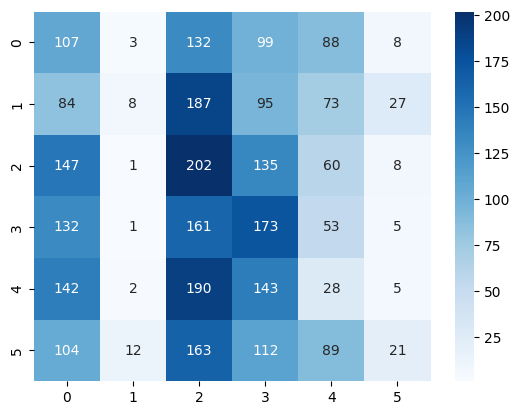

In [43]:

#code here
# display confusion matrix
cm = confusion_matrix(labels_test, test_preds)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)

## Bonus Part
### [10 marks]

### Maximize the accuracy to network parameter ratio and display it. This will be marked relatively

you may use get_params() or dirrectly use your hidden layer tuple to calculate parameters

To achieve marks your accuracy needs to be atleast 55%

# PART 3 [Neural Network from scratch]
### [50 marks]
Please go through the manual for details on this part. You are to use the `part3.csv` to train a model which you are going to make WITHOUT USING LIBRARIES. As you will see, since the data is completely seperable, your model should be able to get 100% accuracy, or something very close to it.

In [ ]:
# Read the file here into your preferred data structure.

In [ ]:
'''
Visualise the dataset using a SINGLE scatter plot.
Make sure to include:
1. Different coloured points for each class
2. A legend
3. x and y labels
4. PLot title
'''

# code here

In [ ]:
# GETTING THE TEST AND TRAIN DATASETS [you are allowed to use a library for this]

In [ ]:
# NEURAL NETWORK FROM SCRATCH AND TRAINING 

In [ ]:
# TESTING AND ACCURACY

# And that's it! You're done with the programming part of this course :D